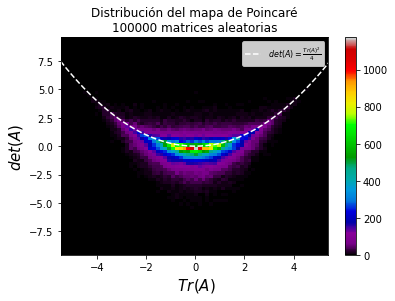

[ 2.09489462e-03 -4.49527025e-01  6.29203509e-01 ...  3.15625364e+00
 -9.63274022e-01  1.65649964e+00]
[ 0.41443177 -4.22975649 -0.67656229 ...  2.14302844 -1.30077954
  1.96003679]
{'Uniform motion': '0.046%', 'Source': '11.221%', 'Degenerated source': '0.0%', 'Spiral source': '13.42%', 'Center': '0.182%', 'Spiral sink': '13.293%', 'Degenerated sink': '0.003%', 'Sink': '11.289%', 'Line of stable fixed points': '25.167%', 'Saddle': '0.177%', 'Line of unstable fixed points': '25.202%'}


In [1]:
# DAVID HOLGUÍN GÓMEZ
%matplotlib inline
import time 
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg


#np.random.seed(5)
def random_matrix_properties(amount):
    lst_determinant,lst_trace = np.zeros(amount),np.zeros(amount)
    for i in range(amount):
        B = [np.random.randint(-2, high=2)*np.random.random_sample() for x in range(4)] # Crea una matriz aleatoria
        B = np.reshape(np.array(B),(2,2))
        C = [np.random.randint(-2, high=2)*np.random.random_sample() for x in range(4)] # Crea una matriz aleatoria
        C= np.reshape(np.array(C),(2,2))
        
        A = B - C # De da una matriz aleatoria con número negativos
        determinant, trace = np.linalg.det(A),np.trace(A)
        lst_determinant[i] = determinant#Corregir: Agregar a dónde
        lst_trace[i] = trace
    return lst_trace,lst_determinant

def zones_dictionary(lst_trace,lst_determinant):
    zones = {
        'Uniform motion':0,
        'Source':0,
        'Degenerated source':0,
        'Spiral source':0,
        'Center':0,
        'Spiral sink':0,
        'Degenerated sink':0,
        'Sink':0,
        'Line of stable fixed points':0,
        'Saddle': 0,
        'Line of unstable fixed points':0,
        }
    
    for i in range(len(lst_determinant)):
        determinante, traza = lst_determinant[i] , lst_trace[i]
        delta = np.power(traza,2) - 4*determinante
        #ORIGEN
        if np.linalg.norm([traza,determinante]) <  np.power(10.0,-5):
            zones['Uniform motion'] += 1
        #PRIMER CUADRANTE    
        elif delta > 0 and traza > 0 and determinante > 0:
            zones['Source'] += 1
        elif np.absolute(delta) <= np.power(10.0,-5) and traza > 0 and determinante > 0:
            zones['Degenerated source'] += 1
        elif delta < 0 and traza > 0 and determinante > 0:
            zones['Spiral source'] += 1
        elif delta < 0 and np.absolute(traza) < np.power(10.0,-5) and determinante > 0:
                zones['Center'] += 1
        #SEGUNDO CUADRANTE       
        elif delta < 0 and traza < 0 and determinante > 0:
            zones['Spiral sink'] += 1
        elif np.absolute(delta) < np.power(10.0,-6) and traza < 0 and determinante > 0:
            zones['Degenerated sink'] += 1
        elif delta > 0 and traza < 0 and determinante > 0:
            zones['Sink'] += 1
        #TERCER Y CUARTO CUADRANTE 
        elif delta > 0 and traza < 0 and determinante <= 0:
            zones['Line of stable fixed points'] += 1
        elif delta > 0 and np.absolute(traza) < np.power(10.0,-5) and determinante <= 0:
                zones['Saddle'] += 1
        elif delta > 0 and traza > 0 and determinante <= 0:
            zones['Line of unstable fixed points'] += 1
    
    for key,value in zones.items():
        zones[key] = str(100*value/len(lst_determinant))+'%'
        
    return zones

#Plot
def plot(x,y):    
    x1 = np.linspace(min(x),max(x),100)
    plt.plot(x1,np.power(x1,2)/4,color= 'white',linestyle = 'dashed' ,label = r'$det(A) = \frac{Tr(A)^{2}}{4}$')
    plt.hist2d(x, y,bins=(70, 70),cmap= plt.cm.nipy_spectral)
    plt.colorbar()
    plt.ylabel(r'$det(A)$',fontsize = 15)
    plt.xlabel(r' $Tr(A)$',fontsize = 15)
    plt.title('Distribución del mapa de Poincaré\n'+f'{CANTIDAD} matrices aleatorias')
    #LEGENDS
    plt.legend(loc='best',fontsize = 8)
    plt.savefig('C:\\Users\\Usuario\\Documents\\UN\\Herramientas Computacionales\\Tareas\\T10\\Distribucion.pdf')
    plt.show()
    
CANTIDAD = 100000

x,y = random_matrix_properties(CANTIDAD)
z = zones_dictionary(x,y)

plot(x,y)

print(f'{x}\n{y}\n{z}')
    
            
    
    
  
  
    